<center><h1> CPE 4040 Spring 2022: Homework 4 </h1></center>
<center><h2> Johnny Lozano </h2></center>

1. Write your answer in the cell provided under each question.
2. Write comments in the code to explain your thoughts.
3. Show your execution result. 
4. Do your own work. Do not copy-and-paste other people's codes.    

### Submission:
 * Submit this notebook file and the pdf version - remember to add your name in the filename.
 * Deadline: 11:59 pm, 3/16 (Wednesday)

In [81]:
import numpy as np
import matplotlib.pyplot as plt

<h3>Q1: Rolling Dices (35 Points)</h3>
    
Assume that you have a fair dice of six faces, that is, it is equally likely to get any of the 6 possible outcomes for one dice roll.

Q1.1: Applying the same method that we used for coin tosses, write a code to simulate the probability of occurrence for each of the 6 numbers. You will perform at least 600,000 rolls. 

The result should be presented as follows:
   * Number of 1's = 100,000. Probability = 16.67%
   * Number of 2's = 96,000. Probability = 16.0%
   * ......

In [82]:
# Create a random integer array of values from 1 to 6 with equal probability

n_rolls = 600000

roll = np.random.randint(1,7, size=n_rolls)
# np.unique(arr, return_counts = True): a useful way to find unique elements and count # of occurrences
outcome, counts = np.unique(roll, return_counts=True)
#print (outcome, counts)

for i in outcome:
    print ("Number of {}'s =".format(i), counts[i-1], 
           "\t Probability = {}%".format(round(counts[i-1]/n_rolls*100, 2)))

Number of 1's = 100208 	 Probability = 16.7%
Number of 2's = 99884 	 Probability = 16.65%
Number of 3's = 99935 	 Probability = 16.66%
Number of 4's = 100136 	 Probability = 16.69%
Number of 5's = 99531 	 Probability = 16.59%
Number of 6's = 100306 	 Probability = 16.72%


Q1.2: Suppose you roll the dice 10 times, what is the probability of getting '5' exactly 5 times? Write a simulation of 200,000 trials for the answer.

In [77]:
n_rolls = 200000
outcome = 0

# We want to find out if "5" occurs exactly 5 times in 10 rolls

for i in np.arange(n_rolls):
    roll_10 = np.random.randint(1,7, size=10)   # One trial = 10 rolls of dice
    bool5 = roll_10 == 5     # A boolean array to count the number of True (roll=5)
    if bool5.sum() == 5:
        outcome += 1

print ('Prob. of rolling 5 for exactly 5 times = {}%'.format(round(outcome/n_rolls*100, 2)))

Prob. of rolling 5 for exactly 5 times = 1.29%


Q1.3: Suppose you are rolling two fair dices and add the two numbers together. The possible 11 outcomes range from 2 (1+1) to 12 (6+6). 

Write a simulation of 500,000 trials to find out the probability for each of the 11 outcomes.

The result should be presented as follows:
    * Number of 2's = 14,000. Probability = 2.80%
    * Number of 3's = 27,800. Probability = 5.56%
    * .....

In [83]:
n_rolls = 500000

# Create two indepedenet dice rolling arrays then add two outcomes together
dice_1 = np.random.randint(1,7, size=n_rolls)
dice_2 = np.random.randint(1,7, size=n_rolls)
dice = dice_1 + dice_2

# Again, use np.unique()
outcome, counts = np.unique(dice, return_counts=True)

for i in outcome:
    print ("Number of {}'s =".format(i), counts[i-2], 
           "\t Probability = {}%".format(round(counts[i-2]/n_rolls*100, 2)))

Number of 2's = 13814 	 Probability = 2.76%
Number of 3's = 27482 	 Probability = 5.5%
Number of 4's = 41613 	 Probability = 8.32%
Number of 5's = 55205 	 Probability = 11.04%
Number of 6's = 69456 	 Probability = 13.89%
Number of 7's = 83564 	 Probability = 16.71%
Number of 8's = 69264 	 Probability = 13.85%
Number of 9's = 55644 	 Probability = 11.13%
Number of 10's = 41820 	 Probability = 8.36%
Number of 11's = 28192 	 Probability = 5.64%
Number of 12's = 13946 	 Probability = 2.79%


<h3>Q2: Picking Marbles (25 Points)</h3>

Q2.1: You have a bag of 12 marbles, 6 are red, 4 are white, and 2 are blue. You randomly pick three marbles from the bag. What is the probability of drawing 1 red, 1 white, and 1 blue (in this order)? The theoretical result is 2/55 ~3.636%. Write a simulation of 100,000 trials to verify the answer.

Hint: You can follow the steps here:
1. Create an array of 12 elements, bag = np.array(['r','r','r','r','r','r','w','w','w','w','b','b'])
2. Create the desired outcome of 3 marbels of red, white, and blue, bag3 = np.array(['r','w','b'])
3. For each of the trial, you use np.random.permutation() to shuffle the bag array
4. Create a Boolean array by comparing the first three elements of the shuffled array with the desired outcome.
5. If the values the Boolean array are all True --> you have a match

In [45]:
# Create an array of 12 elements, with 6 red, 4 white, and 2 blue 
bag = np.array(['r','r','r','r','r','r','w','w','w','w','b','b'])
# pattern_3 = the sequence of the first 3 marbels picked
pattern_3 = np.array(['r','w','b'])

print ('First three marbles =', pattern_3)
n_trials = 100000
outcome = 0

for i in np.arange(n_trials):
    shuffle = np.random.permutation(bag)

    # test if the first three marbles match the pattern
    bool = pattern_3 == shuffle[:3]
    # There is a match if all boolean array values are True
    if bool.all():
        outcome += 1
    
print ('Prob. of red-white-blue = {}%'.format(round(outcome/n_trials*100, 2)))    

First three marbles = ['r' 'w' 'b']
Prob. of red-white-blue = 3.56%


Q2.2 With the same bag, you again pick out three marbles. However, the order does not matter this time. What is the probability of drawing 1 red, 1 white, and 1 blue? The theoretical result is 12/55 ~21.82%. Write a simulation of 100,000 trials to verify the answer.

Hint: This question is different from Q2.1 since the order of the drawing is not important as long as you have {r,w,b} in the outcome. You should look for another way to compare the desired outcome with the shuffled arrays.

In [51]:
pattern_3 = np.array(['r','w','b'])
n_trials = 100000
outcome = 0

for i in np.arange(n_trials):
    shuffle =np.random.permutation(bag)

    # The key is to check whether a red, a white, and a blue are picked, so the best way
    # is to use the Python membership command (in). I choose to use np.isin(arr1, arr2) which
    # returns a Boolean array that indicates if elelments in arr1 are in arr2
    bool = np.isin(pattern_3, shuffle[:3])
    if bool.all():
        outcome += 1
    
print ('Prob. = {}%'.format(round(outcome/n_trials*100, 2)))    

Prob. = 21.68%


<h3>Q3: Sine Wave and Random Noise (40 Points)</h3>

A communication system is commonly modelled by the transmitted signal, the channel, and the receiver. 

Let's consider a simple system where the signal is a sine wave and the the channel adds white Gaussian noise to the signal. Therefore, the received signal is represented by

r(t) = s(t) + n(t), where s(t)=sine wave, n(t)=Gaussian noise

Q3.1 Plot a 10-second sine wave with amplitude 1, f=2Hz and sampling rate fs=100Hz. Use Matplotlib to plot the sine wave. You should have a total of 1000 samples. 

Properly label the x-axis ("Time"), and y-axis ("Amplitude").

Hint: Use the generate_sine_wave() function below

In [85]:
def generate_sine_wave(freq, sample_rate, duration):
    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    y = np.sin((2 * np.pi) * freq * t)
    return t, y

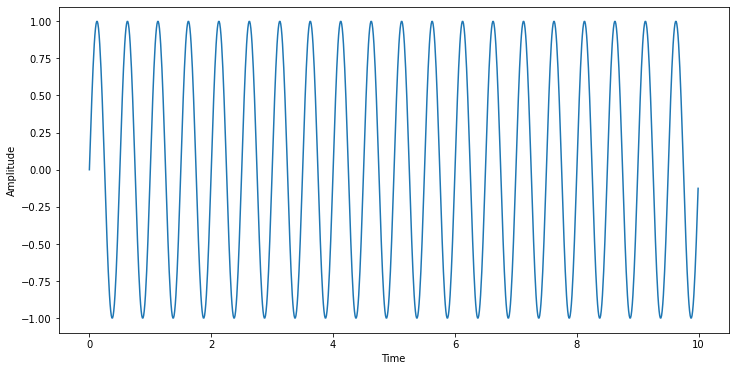

In [86]:
fs = 100
duration = 10   # 10-second 
f = 2    # the center frequency
time, x = generate_sine_wave(f, fs, duration)

plt.figure(figsize=(12,6))
plt.plot(time, x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

Q3.2: Create an array of Gausian noise with mean = 0 and standard deviation = 0.5. Use np.random.normal to generate the noise array. The size of the noise array should also be 1000. 

Add the sine wave array from Q3.1 and the noise arrays together. Plot the resulting array.

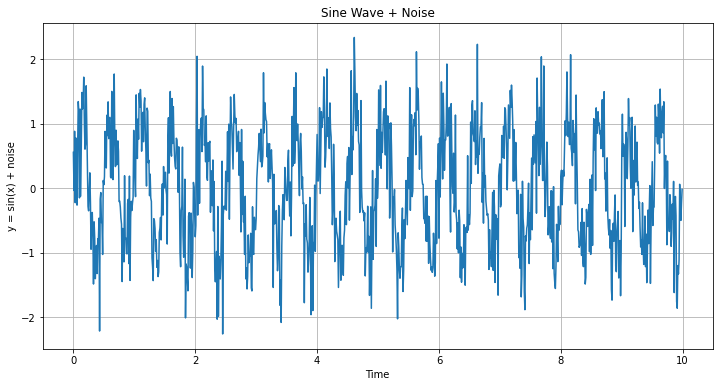

In [87]:
n = np.random.normal(scale=0.5, size=x.size)

y = x + n

plt.figure(figsize=(12,6))

plt.plot(time, y)       # signal + noise
plt.title('Sine Wave + Noise')
plt.xlabel('Time')
plt.ylabel('y = sin(x) + noise')
plt.grid(True, which='both')

Q3.3: Signal-to-noise ratio (SNR) is an important quality indicator of the communication channel. The higher the SNR, the better the channel quality.

SNR(dB) = 10log10(P_s/P_n), where P_s is the average signal power and P_n is the average noise power.

Please calculate the SNR(dB) of this case. The average power of a sequence of signals = SUM (s^2)/N, where N is # of samples

In [90]:
# Q3-3: SNR = Signal-to-Noise ratio = (Average Singal Power)/(Average Noise Power)
# Average power of a sequence of signals = SUM (s^2)/N, where N is # of samples 
 
n_samples = y.size     # should be 1000 samples

P_s = np.sum(x**2)/n_samples
P_n = np.sum(n**2)/n_samples

print ('Ave. signal power = %.3f'%P_s)
print ('Ave. noise power = %.3f'%P_n)

SNR = 10 * (np.log10(P_s/P_n))   # express SNR in dB
print ('SNR = %.2f dB' % SNR )

# Side note: the average power of a sine wave is always 0.5*A^2, A=amplitude of the sine wave
# The average power of a white noise is actually its variance = square of standard deviation (std).
# In this case, std = 0.5, so variance = 0.25
# So, the simulation confirms the theoretical calculation.

Ave. signal power = 0.500
Ave. noise power = 0.254
SNR = 2.94 dB
